<h1><center>CSCI - 6409 - The Process of Data Science - Summar 2022</h1></center>
<h1><center>Final Project</h1></center>
<center>

<b>Anuj Dev</b> - B00900887

<b>Jay Patel</b> - B00886902

<b>Meha Desai</b> - B00895646

<b>Purvilkumar Bharthania</b> - B00901605

<b>Viren Malavia</b> - B00895669

**<h3>Loan Prediction Based on Customer Behavior<h3>**

</center>

**<h4>Problem Statement</h4>**

Finance companies, banks are deals with different kinds of loans such as education loan, shop loans, home loans, personal loans etc. Though lot of people are applying for loans. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, lot of misconception may happen to select the genuine applicant. Therefore, it is important to develop loan prediction system, so the system automatically selects the eligible candidates based on the factors such as income of the applicant, professional experience, house ownership and such more feature.





**<h4>Motivation</h4>**

Customer loan prediction is usually lifetime issue so; each retail bank faces the issue at the minimum lifetime [1]. If done exactly, it can spare a lots of man hours at the conclusion of a retail bank. Also, based on the prediction they can clearly identified the fraudulent and, they can target those customers whether a loan would be approved.

As taking loan is need for the lots of people, the loan prediction can be helpful for the lifetime. Frauds are increasing day by day, as per one report banks in India report loan fraud worth Rs. 5 trillion [2], which is the largest amount of fraud anywhere in the world. Suppose now if we have loan prediction system which can accurately predict the fraud customer based on its data, it can help us to lower down the fraud amount significantly in the future. So, that is why we plan to develop the loan prediction system.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_learning_curves
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

**Data Description**


Data was acquired from Kaggle, one of the most popular data source providers for learning purposes, and
therefore, the data was collected from Kaggle, which contained two data sets, one for training and the other
for testing. The dataset utilized consists of 13 features divided into two sets and contains around 2.5 lakhs of data.


* income : Income of the customer

* age : Age of the customer

* experience : Work experience of the customer in years
 
* profession : Profession of the customer
 
* married : Whether married or single
 
* house_ownership : House ownership status of the customer
 
* car_ownership : Whether the customer owns a car or not
 
* risk_flag : Whether the customer defaulted on the loan or not
 
* currentjobyears : Years of experience in the current job of customer
 
* currenthouseyears : Number of years in the current residence
 
* city : City of residence
 
* state : State of residence

We're using the risk_flag as target feature to know whether there has been a default in the past or not. The training dataset will be divided into two parts, such as 80:20 to train the model. The major dataset will be used to train the model, while the minor dataset will be utilized to test the model, with the accuracy of our developed model evaluated as a result.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainingData = pd.read_csv("./drive/MyDrive/Training Data.csv")
testData = pd.read_csv("./drive/MyDrive/Test Data.csv")

In [ ]:
trainingData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
trainingData.shape

(252000, 13)

In [ ]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


For numerical variables

In [ ]:
numerical_details = trainingData.describe().T

For categorical variables

In [ ]:
categorical_details = trainingData.describe(include=['O']).T

**<h2>Task 1. Data Exploration and preprocessing</h2>**

**<h4>a. Extract the numerical and categorical features from the dataset and build the data quality report.</h4>**

1. Data Quality Report

Following these Steps to create the Data Quality Report:

1.   Find all the types **Data Types** 
2.   Count the **Missing Values**
3.   Check All the **Unique Values** in the Dataset
4.   Find the **Maximum Value**
5.   Find the **Minimum Value**


In [ ]:
def generateDataQualityReportNumerical(dataFrame):

  datatypes = pd.DataFrame(dataFrame.dtypes,columns=['Data type'])

  missing_value_count = pd.DataFrame(dataFrame.isnull().sum(),columns=['Missing values'])
  
  unique_value_count = pd.DataFrame(columns=['Unique values'])
  minimum_value = pd.DataFrame(columns=['Minimum'])
  maximum_value = pd.DataFrame( columns=['Maximum'])
  mean_value = pd.DataFrame( columns=['Mean'])


  for column in list(dataFrame.columns.values):
    unique_value_count.loc[column] = [dataFrame[column].value_counts().nunique()] 
    minimum_value.loc[column] = [dataFrame[column].min()]
    maximum_value.loc[column] = [dataFrame[column].max()]


  data_quality_report = datatypes.join(missing_value_count). join(unique_value_count).join(maximum_value).join(minimum_value).join(numerical_details)
  print(data_quality_report)

In [ ]:
def generateDataQualityReportCategorical(dataFrame):

  datatypes = pd.DataFrame(dataFrame.dtypes,columns=['Data type'])

  missing_value_count = pd.DataFrame(dataFrame.isnull().sum(),columns=['Missing values'])
  
  unique_value_count = pd.DataFrame(columns=['Unique values'])
  minimum_value = pd.DataFrame(columns=['Minimum'])
  maximum_value = pd.DataFrame( columns=['Maximum'])
  mean_value = pd.DataFrame( columns=['Mean'])


  for column in list(dataFrame.columns.values):
    unique_value_count.loc[column] = [dataFrame[column].value_counts().nunique()] 
    minimum_value.loc[column] = [dataFrame[column].min()]
    maximum_value.loc[column] = [dataFrame[column].max()]


  data_quality_report = datatypes.join(missing_value_count). join(unique_value_count).join(maximum_value).join(minimum_value).join(categorical_details)
  print(data_quality_report)

**Data quality report : Numerical features**

In [ ]:
print("Data quality report : Numerical features")
numerical_features = trainingData.select_dtypes(exclude=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
numerical_data = pd.DataFrame(trainingData, columns= numerical_features)
generateDataQualityReportNumerical(numerical_data)

Data quality report : Numerical features
Numerical features: ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
                  Data type  Missing values Unique values  Maximum Minimum  \
Id                    int64               0             1   252000       1   
Income                int64               0            18  9999938   10310   
Age                   int64               0            59       79      21   
Experience            int64               0            20       20       0   
CURRENT_JOB_YRS       int64               0            15       14       0   
CURRENT_HOUSE_YRS     int64               0             5       14      10   
Risk_Flag             int64               0             2        1       0   

                      count          mean           std      min         25%  \
Id                 252000.0  1.260005e+05  7.274628e+04      1.0    63000.75   
Income             252000.0  4.997117e+06  2.878311e+06  10310.

**Data quality report : Categorical features**

In [ ]:
print("Data quality report : Categorical features")
categorical_features = trainingData.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")
categorical_data = pd.DataFrame(trainingData, columns= categorical_features)
generateDataQualityReportCategorical(categorical_data)

Data quality report : Categorical features
Categorical features: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
                Data type  Missing values Unique values       Maximum  \
Married/Single     object               0             2        single   
House_Ownership    object               0             3        rented   
Car_Ownership      object               0             2           yes   
Profession         object               0            51  Web_designer   
CITY               object               0           243   Yamunanagar   
STATE              object               0            28   West_Bengal   

                                Minimum   count unique            top    freq  
Married/Single                  married  252000      2         single  226272  
House_Ownership            norent_noown  252000      3         rented  231898  
Car_Ownership                        no  252000      2             no  176000  
Profession       

**<h4>b. Identify data quality issues and build the data quality plan.</h4>**

**1.	Identifying and handling the missing values:**
The data gathered frequently encounter the issue of missing data. When a feature in a dataset doesn't have a value, this issue arises.

<br>

Here we have found the count of missing values in the dataset


Checking for the Null Values

In [ ]:
trainingData.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**There are no missing-values ​​in the training dataset.**

**2.	Encoding the categorical data:**
We convert text data into numeric data during encoding. The process of encoding categorical data entails converting categorical data to numeric data.


**3.	Removing outliers:**
Finding and dealing with outliers is one of the most crucial processes in data preparation since they can have a detrimental impact on statistical analysis and the training of a machine learning algorithm, leading to reduced accuracy.

<br>

We have used here **Boxplots** for the detection of the outliers.


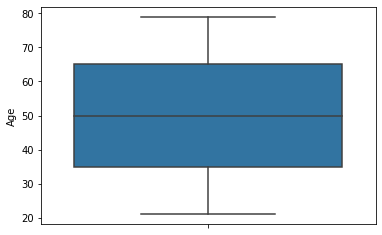

In [ ]:
sns.boxplot(y = 'Age', data = trainingData);

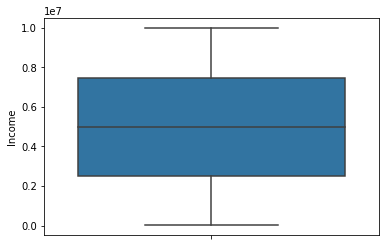

In [ ]:
sns.boxplot(y = 'Income', data = trainingData);

**<h4>d. Exploring the data set to find patterns in the data (e.g. correlation, trends, etc)</h4>**

Correlation Heatmap

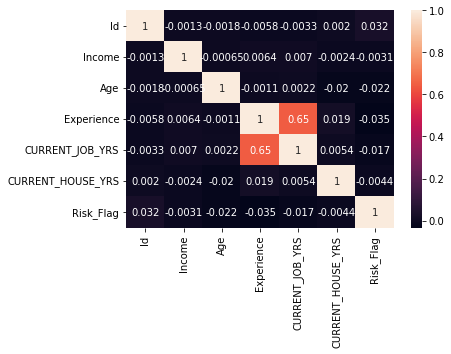

In [ ]:
sns.heatmap(trainingData.corr(), annot=True); 

In [ ]:
numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"] 

**<h4>Visualizations</h4>**

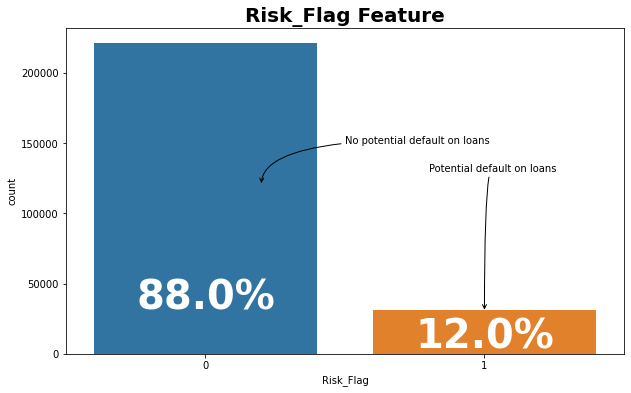

In [ ]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=trainingData, x='Risk_Flag')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(trainingData)*100,0)}%", ha='center', size=40, weight='bold', rotation=360, color='white')
plt.title("Risk_Flag Feature", size=20, weight='bold')
plt.annotate(s="No potential default on loans", xytext=(0.5,150000),xy=(0.2,120000), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(s="Potential default on loans", xytext=(0.8,130000),xy=(1,30000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.show()

The classes are heavily skewed we need to solve this issue later, with algorithm SMOTE (Synthetic Minority Oversampling TEchnique) or use the under sampling or over sampling.

<br>

Class 0 represents 88.00% of the dataset, while class 1 only 12.00%

In [ ]:
trainingData = trainingData.drop("Id",axis=1)

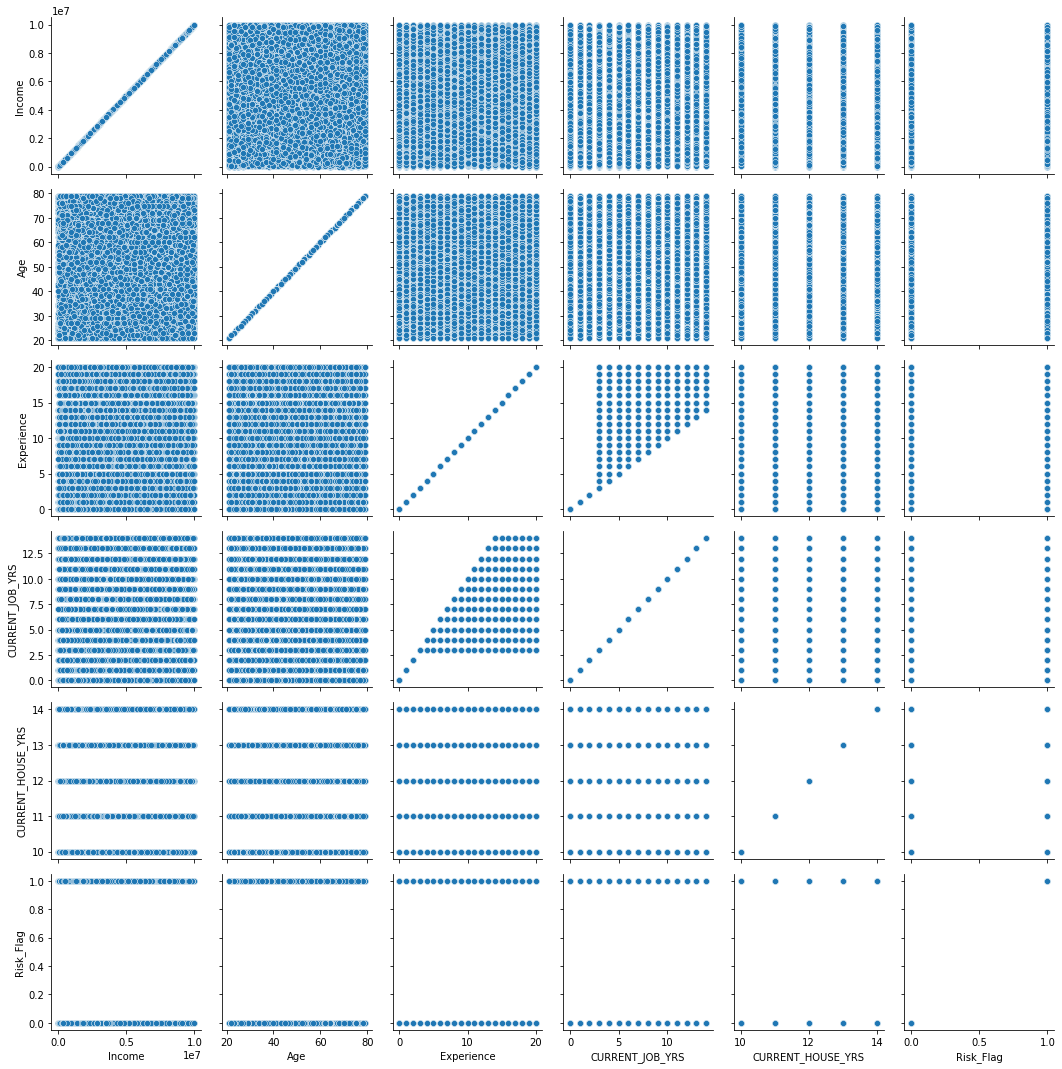

In [ ]:
g = sns.PairGrid(trainingData)
g.map(sns.scatterplot)
plt.show()

Distribution of Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


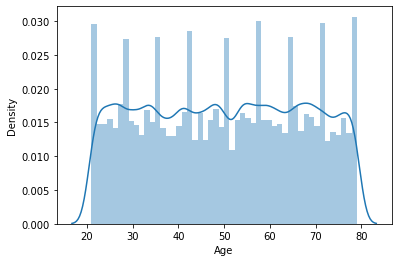

In [ ]:
sns.distplot(a=trainingData["Age"]);

Effect of House ownership on Risk Flag

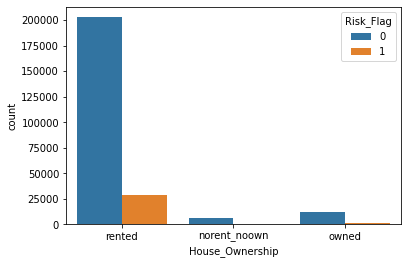

In [ ]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=trainingData);

As we can see that the most number of defaults is if the person has rented House ownership

Effect of Car owners on Risk Flag

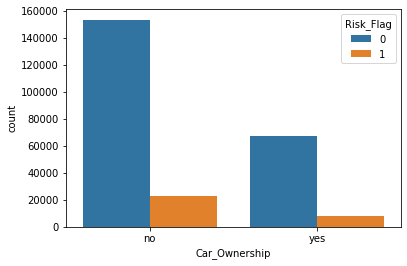

In [ ]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=trainingData);

Effect of Marital Status on Risk Flag

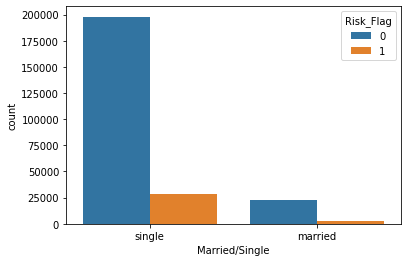

In [ ]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=trainingData);

Distribution of Income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


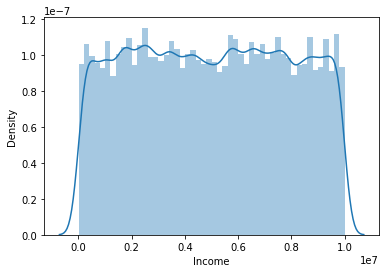

In [ ]:
sns.distplot(a=trainingData["Income"]);

In below visualization, it is showing the distribution of count according to the Profession

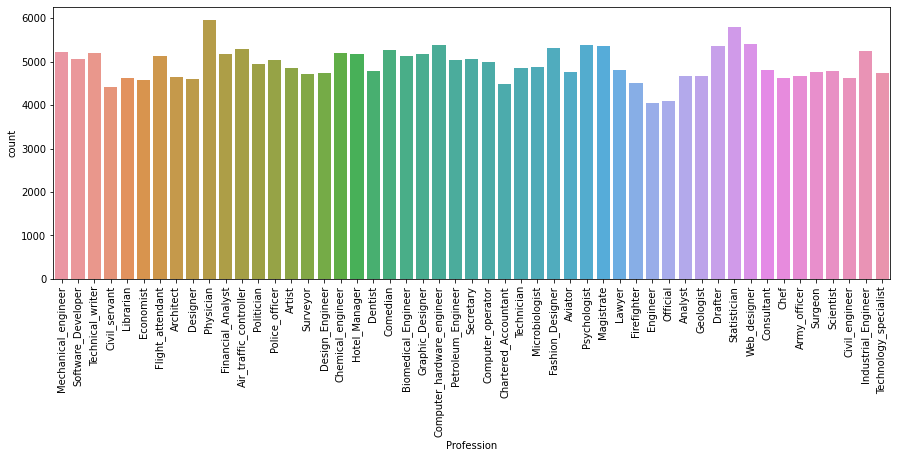

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation="90")
sns.countplot(x="Profession", data=trainingData)
plt.show()

Here the maximum count is for Physician

In below visualization, it is showing the distribution of count according to the Experience

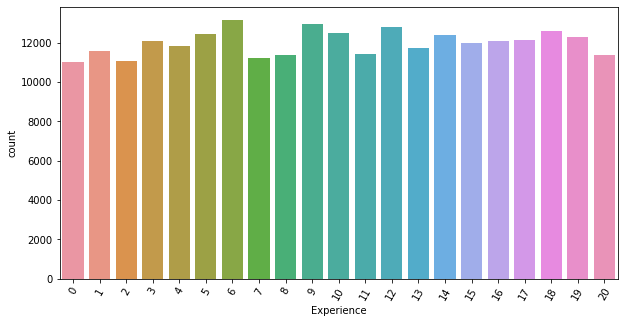

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation="60")
sns.countplot(x="Experience", data=trainingData)
plt.show()

In below CURRENT_JOB_YRS, it is showing the distribution of count according to the Experience

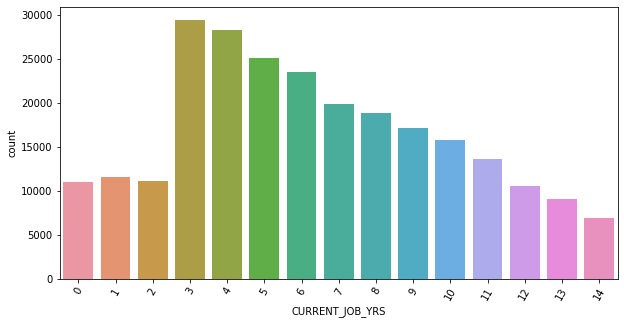

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation="60")
sns.countplot(x="CURRENT_JOB_YRS", data=trainingData)
plt.show()

Here the maximum count is for 3 Years

**<h4>Data understanding<h4>**

We need to address the significant imbalance between the classes.

<br>

Datasets don't contain any outliers. However, Age and Income must be scaled.

<br>

Experience and CURRENT JOB YRS have a strong link; during the feature selection process, one column may need to be dropped.

<br>

Married/Single House_Ownership Car_
Ownership can be binarised or one-hot encoded.

<br>

Using the Chi-square test, we may figure out the relationship between the target variable and the categorical variable.

**Feature Engineering - Modifying our features**

Checking cardinality of categorical features before deciding encoding method.

<br>

Group values in the Proffession, City, and State into bins to reduce number of columns.

In [ ]:
print("Total number of unique professions: {}".format(trainingData["Profession"].nunique()))
print("Total number of unique cities: {}".format(trainingData["CITY"].nunique()))
print("Total number of unique states: {}".format(trainingData["STATE"].nunique()))

Total number of unique professions: 51
Total number of unique cities: 317
Total number of unique states: 29


I'll try altering the unique names to numbers, where a low number indicates a low Risk Flag rate.

This will be done based on the above percent Risk Flag for each distinct value.

In [ ]:
# creates a df of categorical as index and risk_flag as columns, the values are the total counts.
def risk_flag_ranked_dictionary(df, feature):
    group_risk = df.groupby([feature,"Risk_Flag"])[feature].count().unstack()

    # loops through each row and updates the values as a percentage
    for row in group_risk.index:
        group_risk.loc[row] = group_risk.loc[row]/group_risk.loc[row].sum()

    # orders the values by highest percentage loan defaults first
    group_risk = group_risk.sort_values(by=1, ascending=True)
    group_risk["Risk_Rank"] = range(1,len(group_risk)+1)
    
    return group_risk["Risk_Rank"].to_dict()

In [ ]:
# example of output:
risk_flag_ranked_dictionary(trainingData, "Profession")

{'Air_traffic_controller': 41,
 'Analyst': 24,
 'Architect': 37,
 'Army_officer': 49,
 'Artist': 27,
 'Aviator': 39,
 'Biomedical_Engineer': 32,
 'Chartered_Accountant': 50,
 'Chef': 25,
 'Chemical_engineer': 11,
 'Civil_engineer': 44,
 'Civil_servant': 19,
 'Comedian': 22,
 'Computer_hardware_engineer': 34,
 'Computer_operator': 29,
 'Consultant': 31,
 'Dentist': 9,
 'Design_Engineer': 6,
 'Designer': 8,
 'Drafter': 14,
 'Economist': 4,
 'Engineer': 20,
 'Fashion_Designer': 16,
 'Financial_Analyst': 5,
 'Firefighter': 42,
 'Flight_attendant': 28,
 'Geologist': 45,
 'Graphic_Designer': 15,
 'Hotel_Manager': 40,
 'Industrial_Engineer': 3,
 'Lawyer': 35,
 'Librarian': 13,
 'Magistrate': 23,
 'Mechanical_engineer': 10,
 'Microbiologist': 30,
 'Official': 43,
 'Petroleum_Engineer': 2,
 'Physician': 21,
 'Police_officer': 51,
 'Politician': 12,
 'Psychologist': 26,
 'Scientist': 46,
 'Secretary': 36,
 'Software_Developer': 47,
 'Statistician': 18,
 'Surgeon': 17,
 'Surveyor': 48,
 'Technica

In [ ]:
def transform_categorical_to_risk_rank(row, dic):
    return dic[row]

In [ ]:
for feature in trainingData.columns[-6:-1]:
    dic = risk_flag_ranked_dictionary(trainingData, feature)
    trainingData[feature] = trainingData[feature].apply(lambda row: transform_categorical_to_risk_rank(row, dic))

**One-hot encode the other features:**

In [ ]:
train_processed  = pd.get_dummies(trainingData, drop_first=True)

**<h2>2. Building a baseline model to classify Risk.</h2>**

**Train and test split**

In [ ]:
X, y = train_processed.drop ('Risk_Flag', axis=1) , train_processed.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split ( X, y,
                                                     test_size = 0.2,
                                                     random_state = 42,
                                                     stratify = y)

**Handling Imbalanced Dataset**

In [ ]:
# SMOTE

smote = SMOTE()

print("Before sampling: " + str(Counter(y_train)))
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After sampling: " + str(Counter(y_train)))

Before sampling: Counter({0: 176803, 1: 24797})
After sampling: Counter({0: 176803, 1: 176803})


**Standardization**

In [ ]:
# performing scaling on all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Function for Evalution of models**

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

**<h4>a. Using a feature selection method to select the features to build a model.</h4>**

Here we have used common method for categorical feature selection that work with a categorical (class) goal variable and categorical input data

Here we have used **Chi-Squared Statistic**.

**Feature Selection Using Chi-Squared:**

A test for independence between categorical variables is an example of Pearson's chi-squared statistical hypothesis test.

The characteristics that are unrelated to the target variable can be eliminated from the dataset using the test results as a guide for feature selection.

The chi2() function in the scikit-learn machine library offers a chi-squared test implementation. Using the SelectKBest class, this method may be used in a feature selection strategy to choose the top k most important characteristics (biggest values).

In [ ]:
# Feature Selection

fs = SelectKBest(score_func = chi2, k = 8)
fit = fs.fit(X, y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print best features

                  Features         Score
0                   Income  3.992087e+06
4                     CITY  2.485978e+05
3               Profession  4.671067e+03
5                    STATE  1.935144e+03
2               Experience  1.073079e+03
6          CURRENT_JOB_YRS  9.474478e+02
1                      Age  6.986581e+02
9    House_Ownership_owned  1.320202e+02
11       Car_Ownership_yes  1.016771e+02
10  House_Ownership_rented  1.427385e+01


**<h4>b. Selecting the evaluation metric.</h4>**

Here we have used Confusion Matrix and Classification report as evaluation matrix for Train as well as Test Data

<br>

**Confusion Matrix:**
A confusion matrix, sometimes referred to as an error matrix, is a condensed table used to evaluate how well a classification model performs. Count values are used to describe the number of accurate and inaccurate predictions for each class.



*   True positive (TP): correct positive prediction
*   False positive (FP): incorrect positive prediction
*   True negative (TN): correct negative prediction
*   False negative (FN): incorrect negative prediction

<br>

**Classification Report**
sklearn classification_report() returns precision, recall and F1-score for each class. 

Metrics for the evaluation of a classification model

**Accuracy:**
The accuracy returns the proportion of correct predictions.

**Precision:**
The precision returns the proportion of true positives among all the values predicted as positive.

**Recall:**
The recall returns the proportion of positive values correctly predicted.

**F1-score:**
The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.

F1-score = (2 x Precision x Recall)/(Precision + Recall)


**<h2>1. Logistic Regression Model<h2>**

**<h4>c. Training and evaluating the model on train and test data.</h4>**

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[23354 20847]
 [ 2128  4071]]
              precision    recall  f1-score   support

           0       0.92      0.53      0.67     44201
           1       0.16      0.66      0.26      6199

    accuracy                           0.54     50400
   macro avg       0.54      0.59      0.47     50400
weighted avg       0.82      0.54      0.62     50400


Train_Set
[[104945  71858]
 [ 65310 111493]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60    176803
           1       0.61      0.63      0.62    176803

    accuracy                           0.61    353606
   macro avg       0.61      0.61      0.61    353606
weighted avg       0.61      0.61      0.61    353606



**<h4>d. Performing Hyperparameter Tuning</h4>**

We will use the grid search. 

The **Grid Search (GS)** strategy is the most fundamental and simple method for optimising hyperparameters, aside from actively looking for suitable candidate values. For each hyperparameter, a list of potential values is established and assessed. The term "grid" refers to the combination of all potential candidates within all necessary hyperparameters into a figurative grid. The combination producing the best performance is then chosen, preferably after being tested in a validation set.

In [ ]:
param_grid = {
    'C': [1.0,0.1,0.01],
    'solver': ['newton-cg','lbfgs','liblinear'],
    'penalty': ['l2'],
}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.599 total time=   2.1s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.614 total time=   2.1s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.615 total time=   2.2s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.613 total time=   2.3s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.613 total time=   2.5s
[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.599 total time=   0.6s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.614 total time=   0.5s
[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.615 total time=   0.6s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.613 total time=   0.5s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.613 total time=   0.6s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.599 total time=   0.6s
[CV 2/5] END C=1.0, penalty=l2, solver=libl

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.613 total time=   8.5s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.613 total time=   2.1s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.599 total time=   0.6s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.614 total time=   0.6s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.615 total time=   0.5s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.613 total time=   0.6s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.613 total time=   0.6s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.599 total time=   0.6s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.614 total time=   0.5s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.615 total time=   0.5s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.613 total time=   0.5s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.613 total time=   0.5s
[CV 1/5] END C=0.01, 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

> grid.best_params — give best parameters of our model.

> It giving best parameter of the model.



In [ ]:
best_param = grid.best_params_
print(best_param)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}



> Training the model using best hyper parameter on training data



In [ ]:
log_model=LogisticRegression(solver=best_param['solver'],penalty=best_param['penalty'],C=best_param['C'])
log_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [ ]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[23355 20846]
 [ 2128  4071]]
              precision    recall  f1-score   support

           0       0.92      0.53      0.67     44201
           1       0.16      0.66      0.26      6199

    accuracy                           0.54     50400
   macro avg       0.54      0.59      0.47     50400
weighted avg       0.82      0.54      0.62     50400


Train_Set
[[104944  71859]
 [ 65317 111486]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60    176803
           1       0.61      0.63      0.62    176803

    accuracy                           0.61    353606
   macro avg       0.61      0.61      0.61    353606
weighted avg       0.61      0.61      0.61    353606



[Text(69.0, 0.5, 'Actual Class'), Text(0.5, 33.0, 'Predicted Class')]

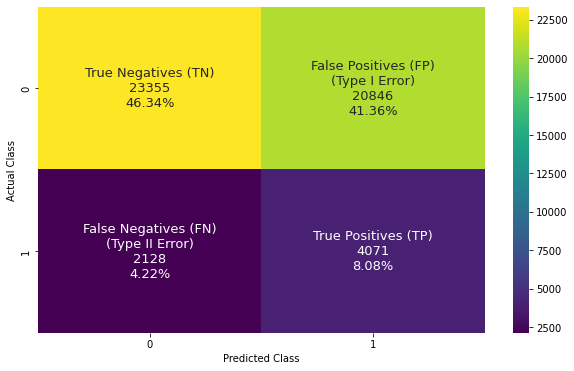

In [ ]:
plt.figure(figsize=(10,6))

y_pred = log_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

**<h4>e. Plotting the learning curve and ROC Curve</h4>**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


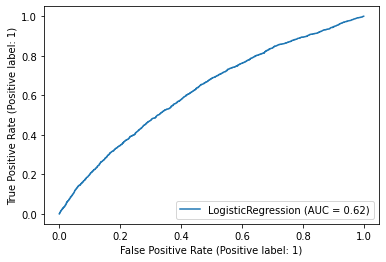

In [ ]:
plot_roc_curve(log_model, X_test, y_test);

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


([0.8772907239819004,
  0.8756239306570891,
  0.8760852556065648,
  0.8765501053435331,
  0.8770326295368291,
  0.8333356900119248,
  0.7176435416363666,
  0.6460527990271631,
  0.6115759870539993,
  0.6120654061299865],
 [0.8770039682539682,
  0.8770039682539682,
  0.8770039682539682,
  0.8770039682539682,
  0.8770039682539682,
  0.8770039682539682,
  0.8593452380952381,
  0.7634722222222222,
  0.6440674603174603,
  0.5441666666666667])

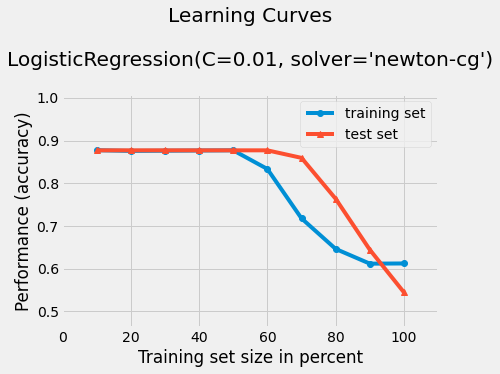

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, log_model, scoring='accuracy')

**<h4>f. How did we make sure that model is not overfitting the data?</h4>**

1.   We have Validated the data through data quality report and fixed all the issues we found
2.   We Used KBestMeans method for feature selection
3.   From the learning curve below also, we can confirm that model is not overfitting.
4.   Moreover we have used the hyperparameters tuning to pick the best parameters
5. 
One method to prevent overfitting is to use additional data during training. These elements make it easy for algorithms to detect the signal and cut down on mistakes more accurately. Cross-validation is an efficient overfitting defense.
6. 
Using the initial training data, make several little train-test splits. Use these divides to adjust the model. 
7.
Cross-validation is used to adjust hyperparameters using only the data from the original training batch. As a consequence, while selecting the final model, we may keep using our test set as a real unknown dataset.

How we detected overfitting:

For model having overfitting, there is a large gap between training and test accuracy. 
Also, training accuracy may come to be more than desired accuracy.

**<h2>2. Decision Tree Classifier Model</h2>**

**<h4>Training and evaluating the model on train and test data.</h4>**

In [ ]:
tree_model = DecisionTreeClassifier ( random_state = 1 )
tree_model.fit (X_train,y_train)
y_pred = tree_model.predict(X_test)

In [ ]:
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )

Accuracy score: 0.65
Roc_Auc score: 0.65


In [ ]:
eval_metric(tree_model, X_train, y_train, X_test, y_test)

Test_Set
[[28645 15556]
 [ 2144  4055]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     44201
           1       0.21      0.65      0.31      6199

    accuracy                           0.65     50400
   macro avg       0.57      0.65      0.54     50400
weighted avg       0.84      0.65      0.71     50400


Train_Set
[[161966  14837]
 [    79 176724]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    176803
           1       0.92      1.00      0.96    176803

    accuracy                           0.96    353606
   macro avg       0.96      0.96      0.96    353606
weighted avg       0.96      0.96      0.96    353606



[Text(69.0, 0.5, 'Actual Class'), Text(0.5, 33.0, 'Predicted Class')]

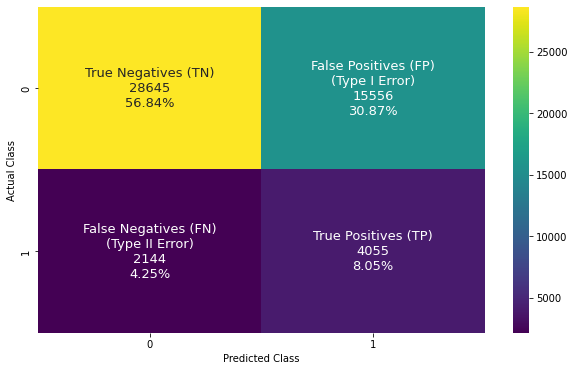

In [ ]:
plt.figure(figsize=(10,6))

y_pred = tree_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

**<h4>Plot the learning curve and ROC Curve</h4>**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


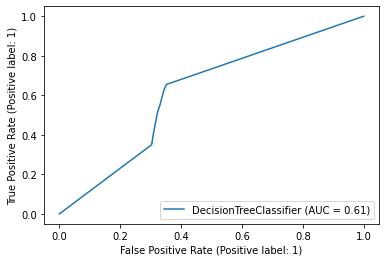

In [ ]:
plot_roc_curve(tree_model, X_test, y_test);

([0.9516968325791855,
  0.9433265932325617,
  0.9403003365352891,
  0.938971451195543,
  0.9374049082877552,
  0.9344796218002196,
  0.9402764984405553,
  0.9474413540532515,
  0.9531587299093466,
  0.9578174578485659],
 [0.8000198412698413,
  0.7832539682539682,
  0.7729365079365079,
  0.7715079365079365,
  0.7756547619047619,
  0.7440476190476191,
  0.6956944444444444,
  0.6695238095238095,
  0.6421230158730159,
  0.6488095238095238])

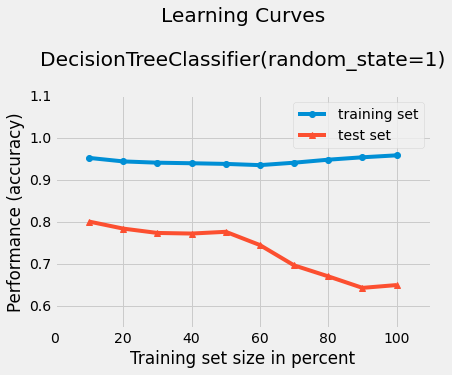

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, tree_model, scoring='accuracy')

**<h4> Decision Tree </h4>**

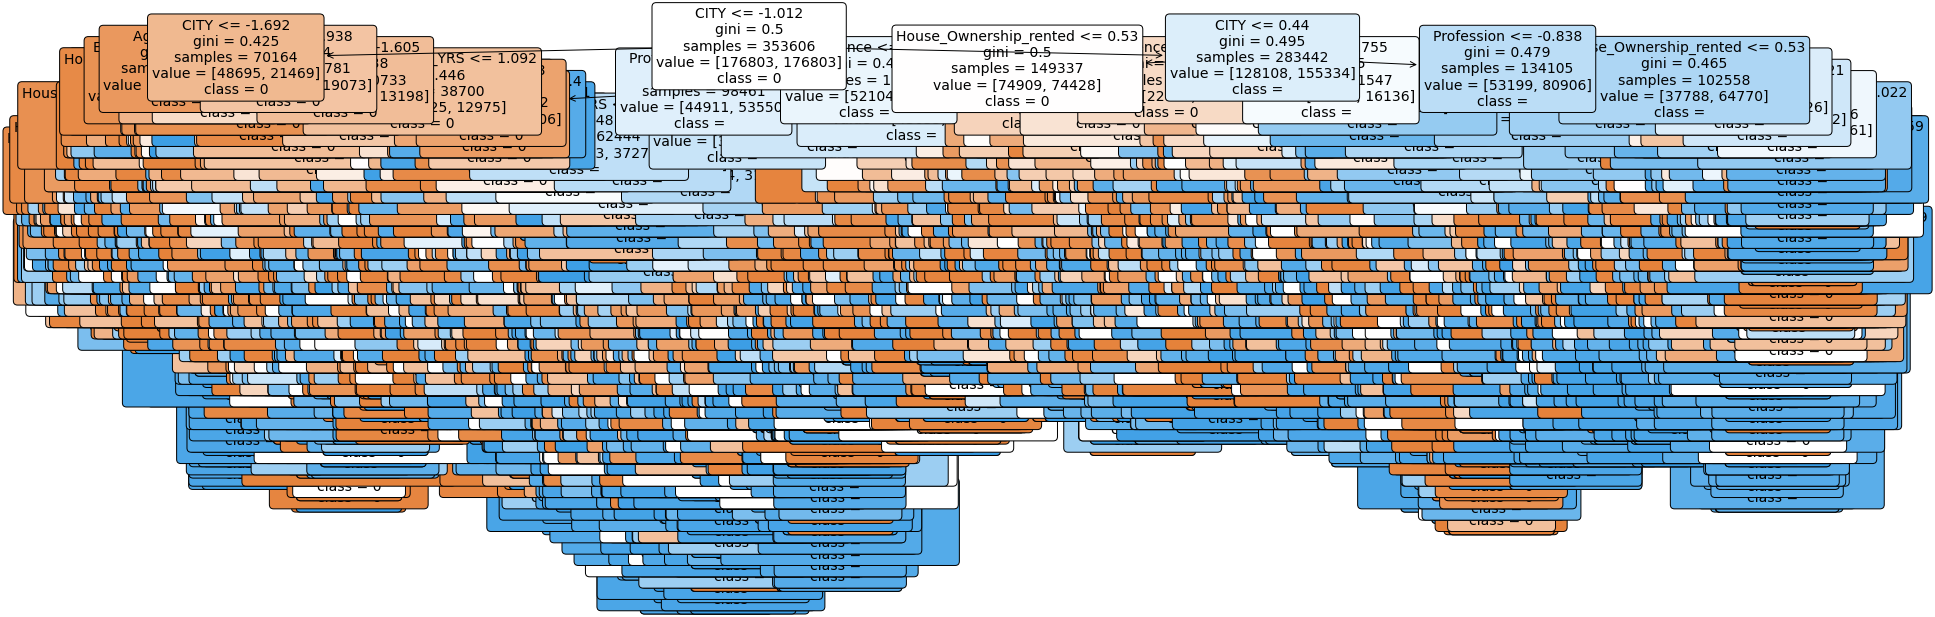

In [ ]:

plt.figure(figsize=(30,10), facecolor ='white')

a = tree.plot_tree(tree_model,feature_names = train_processed.columns.to_list(),class_names = str(train_processed["Risk_Flag"]),rounded = True, filled = True,fontsize=14)

plt.show()

**<h2>3. XG Boost Model<h2>**

**<h4>Training and evaluating the model on train and test data.</h4>**

In [ ]:
xgb_model = XGBClassifier(random_state=101).fit(X_train, y_train)

In [ ]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[23839 20362]
 [ 1963  4236]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68     44201
           1       0.17      0.68      0.28      6199

    accuracy                           0.56     50400
   macro avg       0.55      0.61      0.48     50400
weighted avg       0.83      0.56      0.63     50400


Train_Set
[[103800  73003]
 [ 49288 127515]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63    176803
           1       0.64      0.72      0.68    176803

    accuracy                           0.65    353606
   macro avg       0.66      0.65      0.65    353606
weighted avg       0.66      0.65      0.65    353606



[Text(69.0, 0.5, 'Actual Class'), Text(0.5, 33.0, 'Predicted Class')]

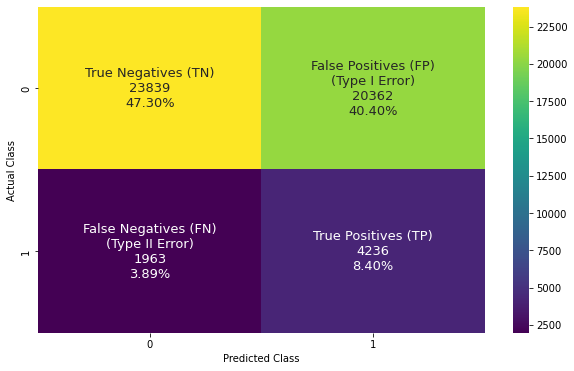

In [ ]:
plt.figure(figsize=(10,6))

y_pred = xgb_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

**<h4>Plotting the learning curve and ROC Curve</h4>**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


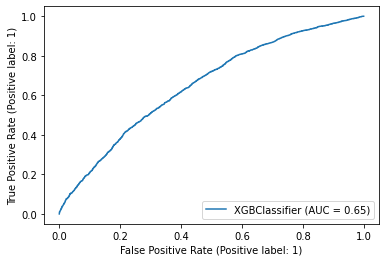

In [ ]:
plot_roc_curve(xgb_model, X_test, y_test);

([0.8787330316742081,
  0.8761188331612958,
  0.876811116033974,
  0.8771934785990018,
  0.8772984621301675,
  0.835164472598898,
  0.7261154473909601,
  0.6670578753128491,
  0.6541123976810319,
  0.6541602800857451],
 [0.8772023809523809,
  0.876765873015873,
  0.8778769841269841,
  0.8775396825396825,
  0.877718253968254,
  0.8776587301587302,
  0.8670436507936508,
  0.7953769841269841,
  0.6683531746031746,
  0.5570436507936508])

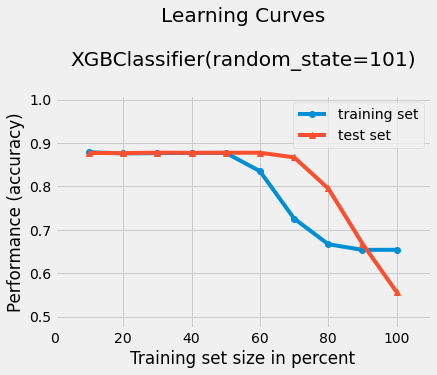

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, xgb_model, scoring='accuracy')

**<h2>4. Random Forest Classifier<h2>**

**<h4>Training and evaluating the model on train and test data.</h4>**

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[37066  7135]
 [ 1140  5059]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     44201
           1       0.41      0.82      0.55      6199

    accuracy                           0.84     50400
   macro avg       0.69      0.83      0.72     50400
weighted avg       0.90      0.84      0.86     50400


Train_Set
[[161966  14837]
 [    79 176724]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    176803
           1       0.92      1.00      0.96    176803

    accuracy                           0.96    353606
   macro avg       0.96      0.96      0.96    353606
weighted avg       0.96      0.96      0.96    353606



[Text(69.0, 0.5, 'Actual Class'), Text(0.5, 33.0, 'Predicted Class')]

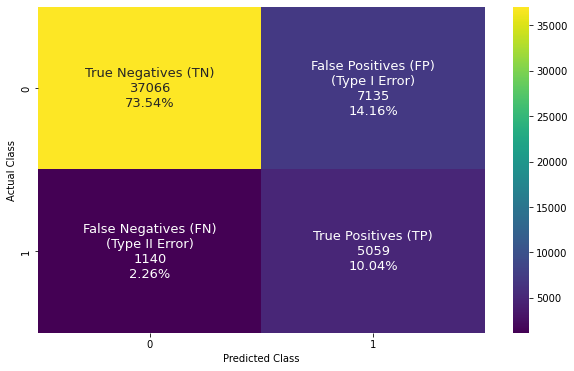

In [ ]:
plt.figure(figsize=(10,6))

y_pred = rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

**<h4>Plotting the learning curve and ROC Curve</h4>**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


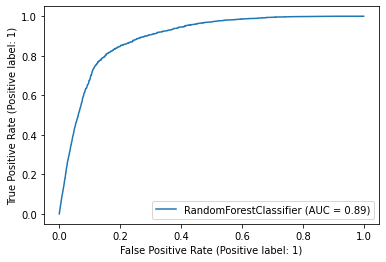

In [ ]:
plot_roc_curve(rf_model, X_test, y_test);

([0.9394513574660633,
  0.9298369649750428,
  0.9267729376608441,
  0.9265918185546019,
  0.9260306669004486,
  0.9298181115463111,
  0.9399209773597712,
  0.9473494435881845,
  0.9531493032097912,
  0.9578174578485659],
 [0.8933928571428571,
  0.8942261904761905,
  0.8947222222222222,
  0.8931349206349206,
  0.8937103174603175,
  0.8937896825396825,
  0.8843253968253968,
  0.8711309523809524,
  0.8512301587301587,
  0.8358134920634921])

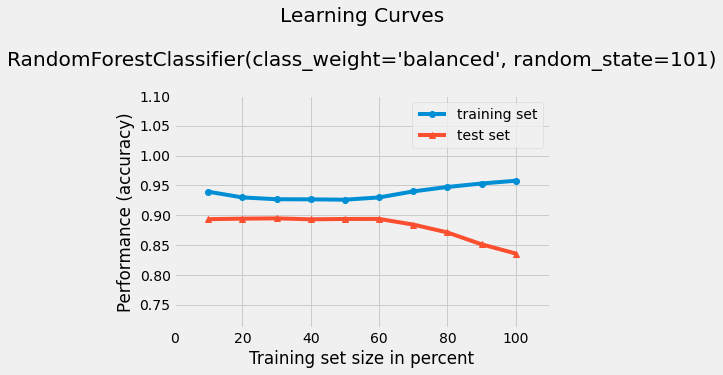

In [ ]:
plot_learning_curves(X_train, y_train, X_test, y_test, rf_model, scoring='accuracy')

**<h4>Feature Importance with Random Forest<h4>**

In [ ]:
gr_rf_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3 )
gr_rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=3, n_estimators=200, random_state=101)

In [ ]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = gr_rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
CITY,0.277283
Income,0.133181
Profession,0.119088
Age,0.111809
Experience,0.089414
STATE,0.084507
CURRENT_JOB_YRS,0.071469
CURRENT_HOUSE_YRS,0.046197
Car_Ownership_yes,0.029876
House_Ownership_owned,0.015915


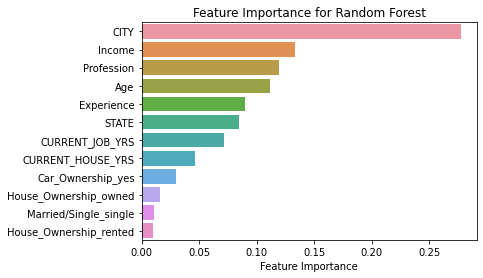

In [ ]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

**<h4>Comparision of all the ROC Curves.<h4>**

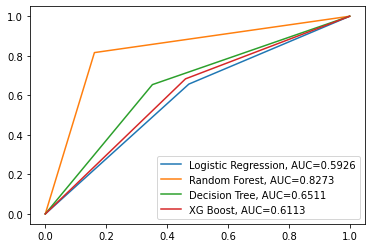

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, log_model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, log_model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, rf_model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, rf_model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, tree_model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, tree_model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, xgb_model.predict(X_test))
auc = round(metrics.roc_auc_score(y_test, xgb_model.predict(X_test)), 4)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc))
#add legend
plt.legend()

**<h4>Statistical Significance Test<h4>**

In [ ]:
log_score = cross_val_score(log_model,X_train, y_train,scoring = 'accuracy', cv=5)
print('Logistic Regression Accuracy: ', log_score.mean(), log_score.std())

Logistic Regression Accuracy:  0.610993623995374 0.005741774018214006


In [ ]:
rf_score = cross_val_score(rf_model,X_train, y_train,scoring = 'accuracy', cv=5)
print('Random Forest Classifier Accuracy: ', rf_score.mean(), rf_score.std())

Random Forest Classifier Accuracy:  0.9252587154739853 0.01668767732694487


In [ ]:
tree_score = cross_val_score(tree_model,X_train, y_train,scoring = 'accuracy', cv=5)
print('Decision Tree Classifier Accuracy: ', tree_score.mean(), tree_score.std())

Decision Tree Classifier Accuracy:  0.9034038368433347 0.00865419886991042


In [ ]:
xgb_score = cross_val_score(xgb_model,X_train, y_train,scoring = 'accuracy', cv=5)
print('XG Boost Accuracy: ', xgb_score.mean(), xgb_score.std())

XG Boost Accuracy:  0.6508204596671222 0.009847092156346228


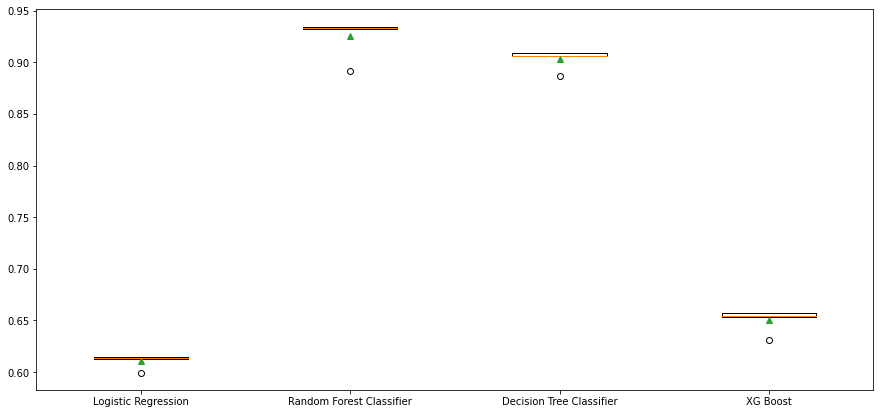

In [ ]:
plt.figure(figsize=(15,7))
plt.boxplot([log_score,rf_score,tree_score,xgb_score], labels=['Logistic Regression', 'Random Forest Classifier', "Decision Tree Classifier", "XG Boost"], showmeans=True)
plt.show()

**Conclusion**

Today’s fast-growing IT industry needs to discover new technology and update the old technology that helps us to reduce human intervention and increase the efficiency of the work. This model is used by the banking system or anyone who wants to apply for a loan. It will be very helpful in bank management. From the analysis of the data, it is very clear that it reduces all the frauds done at the time of loan approval. Time is also very precious for everyone through this not only the bank but also the waiting time of the applicant will also reduce. Here, we have implemented various algorithms to predict customer loans. Optimum results were obtained using Logistic Regression, Random Forest, XGBoost, and Decision Tree Classifier. Compare these four algorithms Random Forest is the one with the highest accuracy.

The future scope of this work can be implemented for predicting the loans according to the dataset taken. Different countries have different attributes as their priority, those attributes can be included in the dataset while training according to their bank’s choice. In the Future, taking the real-time data with a greater number of sample datasets is considered by having a high accuracy rate and less loss. Also, the percentage up to which the loan can be sanctioned will be predicted. By studying the relation between the individual attributes and their dependency on the predicted output, a detailed report can be provided either for loan approval or rejection.


**<h3>References</h3>**

[1]	L. Udaya Bhanu and D. S. Narayana, “Customer loan prediction using supervised learning technique,” Int. J. Sci. Res. Publ. (IJSRP), vol. 11, no. 6, pp. 403–407, 2021.

[2]	M. Saha, “Banks in India report loan fraud worth Rs 5 trn, SBIs amount largest,” Business Standard, 24-May-2021. [Online]. Available: https://www.business-standard.com/article/finance/banks-in-india-report-loan-fraud-worth-rs-5-trn-sbi-s-amount-largest-121052400494_1.html. [Accessed: 03-Aug-2022].

[3] 	A. Shinde, Y. Patil, I. Kotian, A. Shinde, and R. Gulwani, “Loan prediction system using machine learning,” ITM Web of Conferences, vol. 44, p. 03019, 2022.

[4]	A. Gahlaut, Tushar, and P. K. Singh, “Prediction analysis of risky credit using Data mining classification models,” in 2017 8th International Conference on Computing, Communication and Networking Technologies (ICCCNT), 2017.


[5]	L. Ke et al., “Loan repayment behavior prediction of provident fund users using a stacking-based model,” in 2021 IEEE 6th International Conference on Cloud Computing and Big Data Analytics (ICCCBDA), 2021.


[6]	A. Gupta, V. Pant, S. Kumar, and P. K. Bansal, “Bank loan prediction system using machine learning,” in 2020 9th International Conference System Modeling and Advancement in Research Trends (SMART), 2020.


[7] C. N. Sujatha, A. Gudipalli, B. Pushyami, N. Karthik, and B. N. Sanjana, “Loan prediction using machine learning and its deployement on web application,” in 2021 Innovations in Power and Advanced Computing Technologies (i-PACT), 2021, pp. 1-7, doi: 10.1109/i-PACT52855.2021.9696448.



[8] B. Patel, H. Patil, J. Hembram and S. Jaswal, "Loan Default Forecasting using Data Mining," 2020 International Conference for Emerging Technology (INCET), 2020, pp. 1-4, doi: 10.1109/INCET49848.2020.9154100.

[9]	M. A. Sheikh, A. K. Goel and T. Kumar, "An Approach for Prediction of Loan Approval using Machine Learning Algorithm," 2020 International Conference on Electronics and Sustainable Communication Systems (ICESC), 2020, pp. 490-494, doi: 10.1109/ICESC48915.2020.9155614.

[10]	A. Gahlaut, Tushar and P. K. Singh, "Prediction analysis of risky credit using Data mining classification models," 2017 8th International Conference on Computing, Communication and Networking Technologies (ICCCNT), 2017, pp. 1-7, doi: 10.1109/ICCCNT.2017.8203982.

[11]	“Bank loan prediction with different models,” Kaggle.com, 20-Jun-2022. [Online]. Available: https://www.kaggle.com/code/dilaraozcerit/bank-loan-prediction-with-different-models. [Accessed: 03-Aug-2022].


[12]"Loan Prediction Based on Customer Behavior", Kaggle.com, 2022. [Online]. Available: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?datasetId=1532161. [Accessed: 03- Aug- 2022].
